#AI Study - Titanic EDA and Feature Engineering
https://www.kaggle.com/awwalmalhi/titanic-eda-and-feature-engineering

#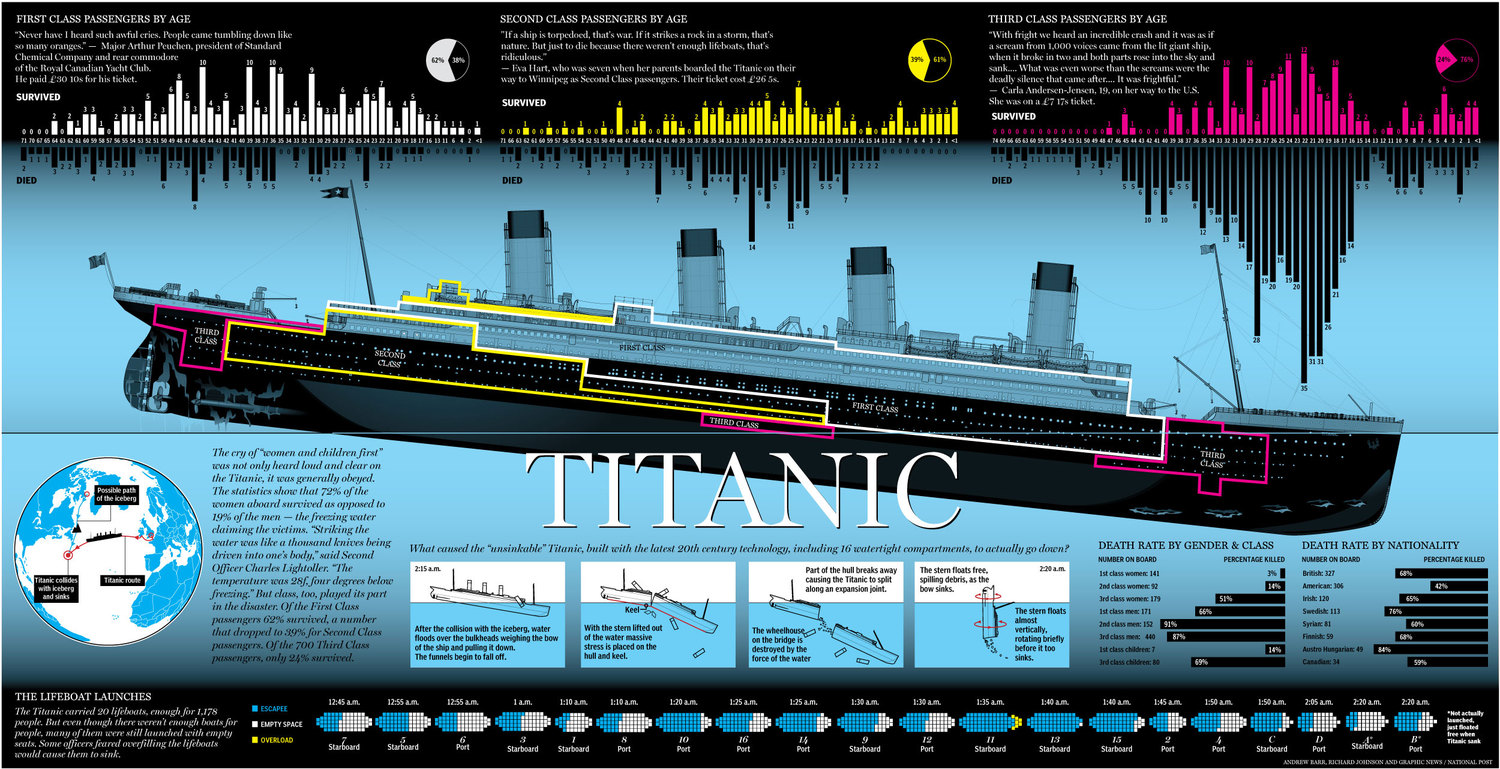

*   survived : 생존=1, 죽음=0
*   pclass : 승객 등급. 1등급=1, 2등급=2, 3등급=3
*   sibsp : 함께 탑승한 형제 또는 배우자 수
*   parch : 함께 탑승한 부모 또는 자녀 수
*   ticket : 티켓 번호
*   cabin : 선실 번호
*   embarked : 탑승장소 S=Southhampton, C=Cherbourg, Q=Queenstown


---
---
#Titanic EDA and Feature Engineering Tutorial
---
# Building Intuition and Best Practices
Beginner Tutorial and Basic Guideline for approaching the Exploratory Data
Analysis and Feature Enginnering.

* how to approach a dataset
* what is value
* features to boost score
---
# Goal
1. go through how to use EDA to best fill the missing Fare and Cabin
2. check out other possibilities
3. check out feature creation possibilities using EDA
4. the visulizations for achieving better score
5. feature engineering

---
#Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#Libraries

In [3]:
import re
import math
import numpy as np
import pandas as pd
import seaborn as sns
sns.set() # default value at seaborn
# import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 

#Color Palettes

* example of palette (https://colorbrewer2.org (sequential, diverging, qualitative))
* example of style sheets (https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html)

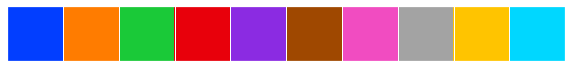

In [4]:
palette = sns.color_palette("bright")
sns.palplot(palette)

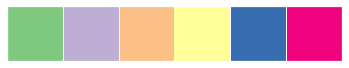

In [5]:
palette = sns.color_palette("Accent", 6)
sns.palplot(palette)

* set the palette

In [6]:
# set the palette 
palette_1 = sns.color_palette("Accent", 6)
palette_2 = sns.color_palette("Set1", 6)
palette_3 = sns.color_palette("BrBG", 6)
palette_4 = sns.color_palette("CMRmap", 6)
palette_5 = sns.color_palette("Paired", 6)
palette_6 = sns.color_palette("RdYlBu", 6)
palette_binary_1 = sns.color_palette('Accent', 2)
palette_binary_2 = sns.color_palette('Set1', 2)
palette_binary_3 = sns.color_palette('Set2', 2)

#Preparing the Training Data

In [7]:
train_data = pd.read_csv('/content/gdrive/My Drive/01.google-colab/61.AIStudy/data/EDA for Titanic/02. Data/train.csv')
test_data = pd.read_csv('/content/gdrive/My Drive/01.google-colab/61.AIStudy/data/EDA for Titanic/02. Data/test.csv')

In [8]:
# shows all of rows or columns
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [9]:
# ignore warning messages
pd.set_option('mode.chained_assignment', None)

In [10]:
train_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [11]:
train_data = pd.read_csv('/content/gdrive/My Drive/01.google-colab/61.AIStudy/data/EDA for Titanic/02. Data/train.csv', index_col='PassengerId')
# test_data = pd.read_csv('/content/gdrive/My Drive/01.google-colab/61.AIStudy/data/EDA for Titanic/02. Data/test.csv')

In [12]:
train_data.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


#Summary

In [13]:
train_data.shape

(891, 11)

In [14]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [15]:
train_data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

---
#Exploratory Data Analysis(1)

#Analysis of Sex :
74.2% of the women survived, only 18.8% of the men survived

,Sex,Survived
0,female,0.742038
1,male,0.188908


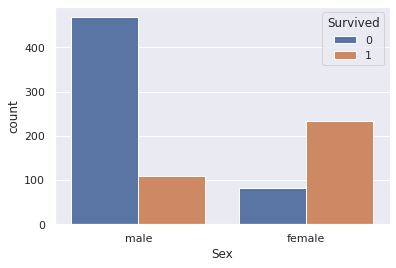

In [16]:
sns.countplot(x=train_data['Sex'], hue=train_data['Survived'])
display(train_data[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean())
# display(train_data[['Sex', 'Survived']].groupby(['Sex']).mean())

#Analysis on the basis of Pclass:


,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


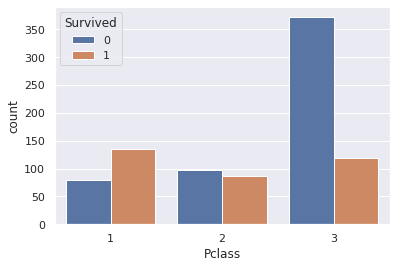

In [17]:
sns.countplot(x=train_data['Pclass'], hue=train_data['Survived'])
# display(train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean())
display(train_data[['Pclass', 'Survived']].groupby(['Pclass']).mean())

#Bar Chart - Sex, Pclass, SibSp, Parch, Embarked

In [18]:
def bar_chart(feature):
    survived = train_data[train_data['Survived']==1][feature].value_counts()
    dead = train_data[train_data['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar', stacked=True, figsize=(10,5))

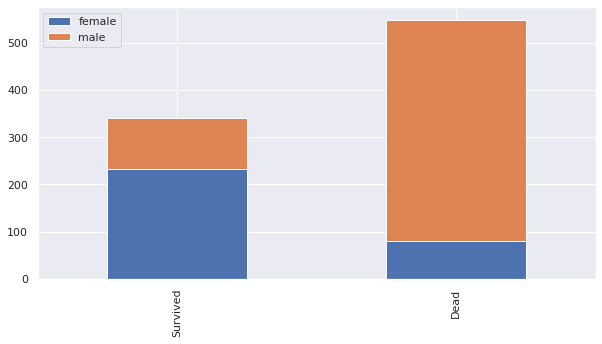

In [19]:
# Sex
bar_chart('Sex')

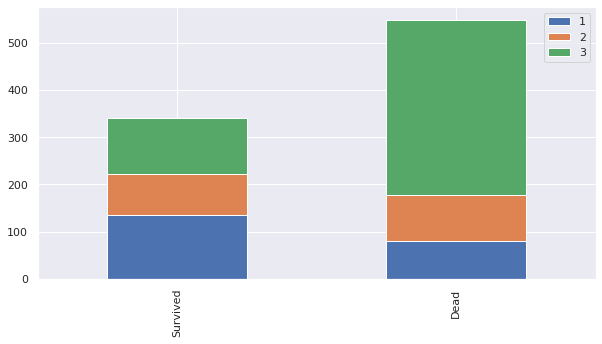

In [20]:
# Pclass : 승객 등급. 1등급=1, 2등급=2, 3등급=3
bar_chart('Pclass')

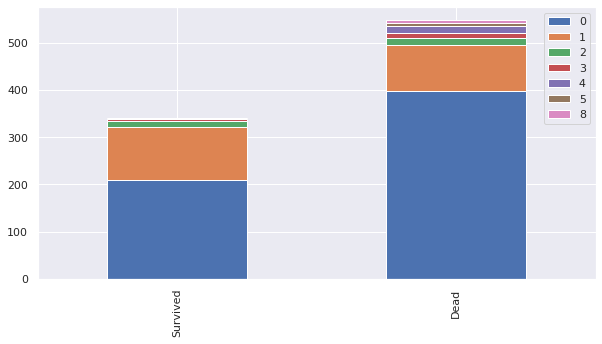

In [21]:
# SibSp : 함께 탑승한 형제 또는 배우자 수
bar_chart('SibSp')

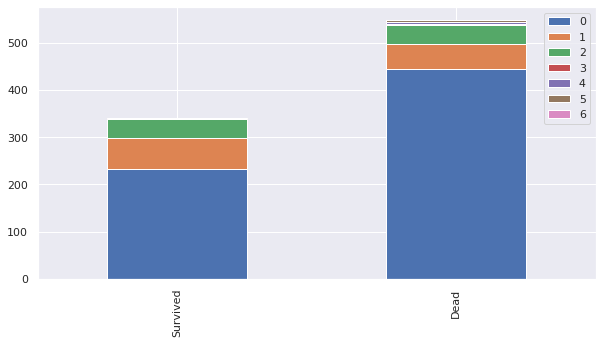

In [22]:
# Parch : 함께 탑승한 부모 또는 자녀 수
bar_chart('Parch')

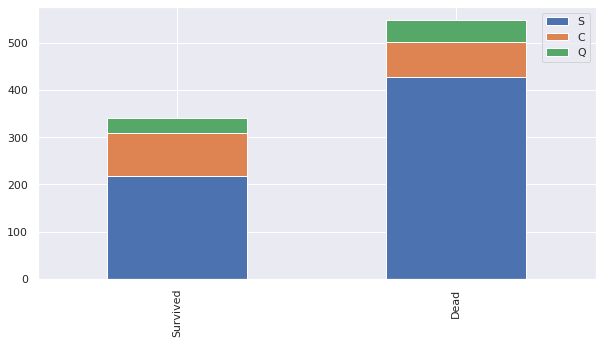

In [23]:
# Embarked : 탑승장소 S=Southhampton, C=Cherbourg, Q=Queenstown
bar_chart('Embarked')

---
#Exploratory Data Analysis(2)

* Age - Sex Distributions

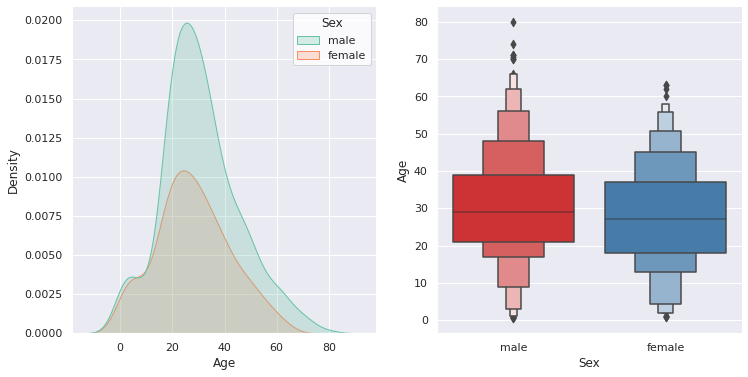

In [24]:
# Age - Sex Distributions
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.set_style('ticks')

# KDE(Kernel Density Estimator) (bar -> histogram -> kde)
sns.kdeplot(data=train_data, x='Age', hue='Sex', fill=True, palette=palette_binary_3, ax=ax[0])
# letter-value plot
sns.boxenplot(data=train_data, x='Sex', y='Age', ax=ax[1], palette=palette_2)

sns.despine()
plt.show()

* A Complete Guide to Plotting Categorical Variables with Seaborn
* https://towardsdatascience.com/a-complete-guide-to-plotting-categorical-variables-with-seaborn-bfe54db66bec

* Sex - Fare Distributions

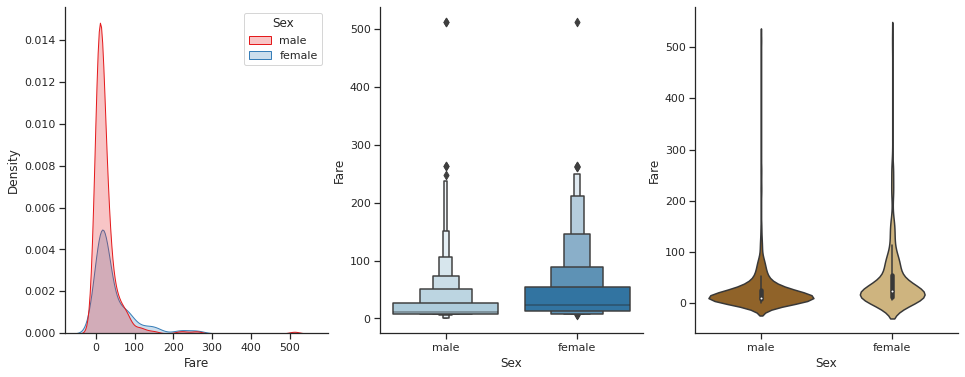

In [25]:
fig, ax = plt.subplots(1, 3, figsize=(16, 6))
#sns.set_style('ticks')

sns.kdeplot(data=train_data, x='Fare', hue='Sex', fill=True, palette=palette_binary_2, ax=ax[0])
sns.boxenplot(data=train_data, x='Sex', y='Fare', ax=ax[1], palette=palette_5)
sns.violinplot(data=train_data, x='Sex', y='Fare', ax=ax[2], palette=palette_3)

sns.despine()
plt.show()

* Pclass - Sex - Age Distributions

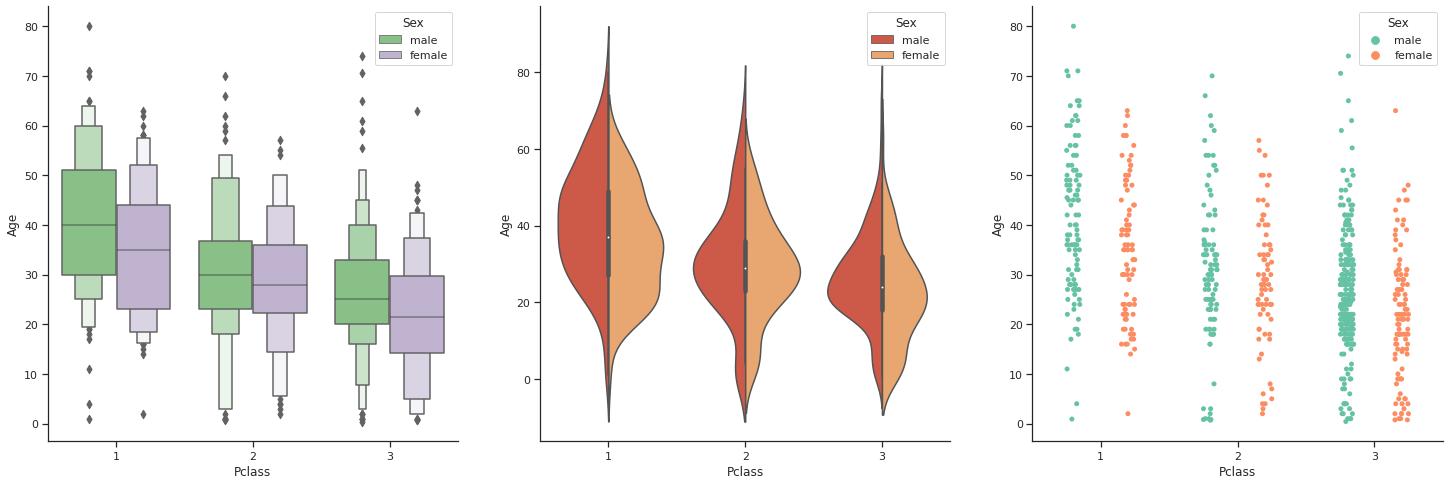

In [26]:
fig, ax = plt.subplots(1, 3, figsize=(25, 8))

sns.boxenplot(data=train_data, x='Pclass', y='Age', hue='Sex', dodge=True, ax=ax[0], palette=palette_1)
sns.violinplot(data=train_data, x='Pclass', y='Age', hue='Sex', split=True, ax=ax[1], palette=palette_6)
sns.stripplot(data=train_data, x='Pclass', y='Age', hue='Sex', dodge=True, ax=ax[2], palette=palette_binary_3)

sns.despine()
plt.show()

# Missing Value Imputation
* find the best possible way to impute missing values
* using median or mean

In [27]:
# na value
print(train_data.isna().sum()) # Age, Cabin, Embarked
# test.isna().sum()
print("Missing Rate of Age(%) = ", (train_data['Age'].isna().sum() / (train_data['Age'].count()+train_data['Age'].isna().sum()))*100,
      ", Missing Rate of Cabin(%) = ", (train_data['Cabin'].isna().sum() / (train_data['Cabin'].count()+train_data['Cabin'].isna().sum()))*100,
      ", Missing Rate of Embarked(%) = ", (train_data['Embarked'].isna().sum() / (train_data['Embarked'].count()+train_data['Embarked'].isna().sum()))*100)

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64
Missing Rate of Age(%) =  19.865319865319865 , Missing Rate of Cabin(%) =  77.10437710437711 , Missing Rate of Embarked(%) =  0.22446689113355783


* Hit Map

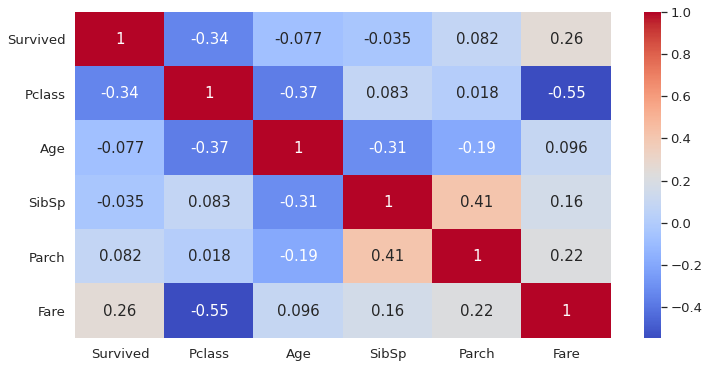

In [28]:
plt.figure(figsize=(12, 6))
sns.set(font_scale=1.2)
sns.set_style('white')

corr = train_data.corr()

sns.heatmap(corr, cmap='coolwarm', annot=True, annot_kws={'size':15})
plt.show()

* Pclass correlates best with the age feature, so we should use the pclass to impute the missing age values

* Now lets check if there are any relationship of age with respect to pclass and sex combined
> * meidan age for each gender is slightly different
> * there is a general trend of decrease in median age for both the genders from Pclass 1 to 3

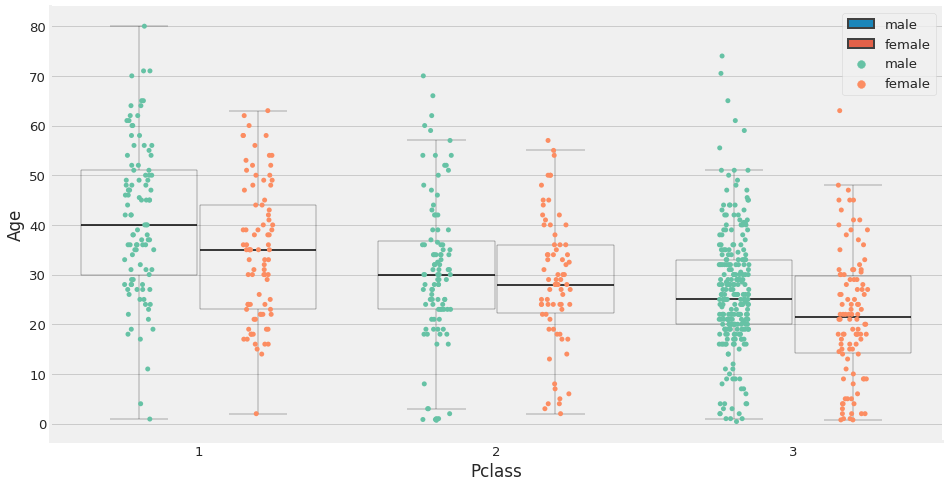

In [29]:
plt.figure(figsize=(16, 8))
plt.style.use('fivethirtyeight')

# box properties
PROPS = {
    'boxprops':{'facecolor':'none', 'edgecolor':'black', 'linewidth':0.3},
    'medianprops':{'color':'black', 'linewidth':1.5},
    'whiskerprops':{'color':'black', 'linewidth':0.3},
    'capprops':{'color':'black', 'linewidth':0.3},
}

sns.boxplot(x='Pclass', data=train_data, y='Age', hue='Sex', showfliers=False,  **PROPS)
sns.stripplot(data=train_data, x='Pclass', hue='Sex', y='Age', palette=palette_binary_3, dodge=True)

sns.despine()
plt.legend(loc='upper right')
plt.show()


*  Cabin feature has a lot of missing value

Figure 1
Pclass at Cabin A =  15
Pclass at Cabin B =  47
Pclass at Cabin C =  59
Pclass at Cabin D =  33
Pclass at Cabin E =  32
Pclass at Cabin F =  13

Figure 2
Pclass 1st =  40
Pclass 2nd =  168
Pclass 3rd =  479


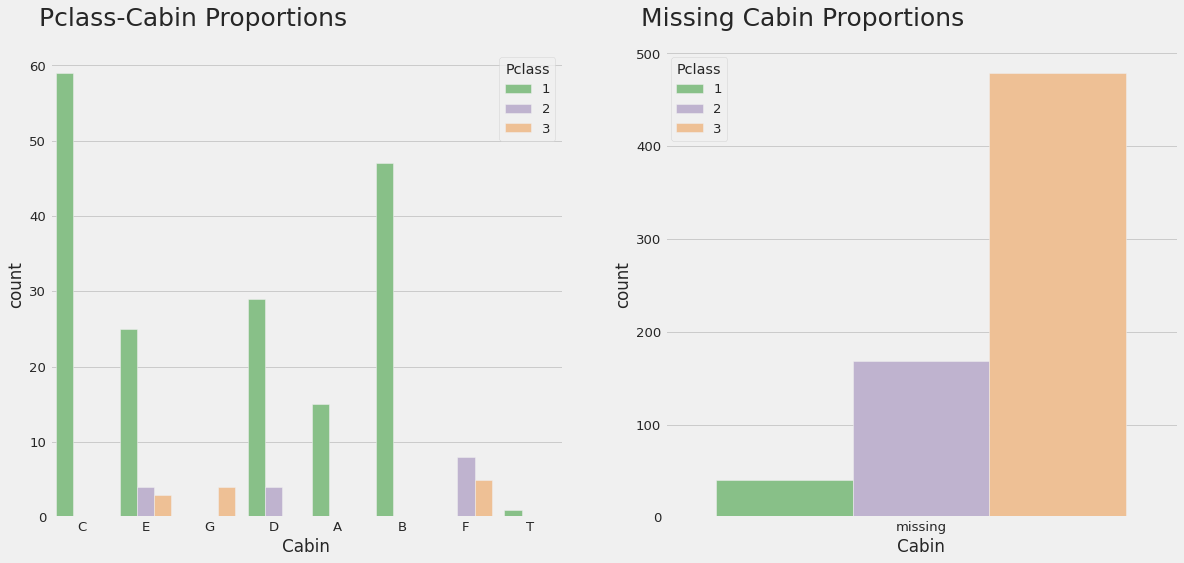

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))
plt.style.use('fivethirtyeight')

cabin_data = train_data.copy()
cabin_data.Cabin.fillna('missing', inplace=True)
cabin_data_missing = cabin_data.loc[cabin_data.Cabin == 'missing']

# figure 1
print("Figure 1")
ax[0].set_title('Pclass-Cabin Proportions', x=0.28, y=1.04, size=25)
cabin_data['Cabin'] = cabin_data.Cabin.str.extract(pat='([A-Z])')
sns.countplot(data=cabin_data, x='Cabin', hue='Pclass', ax=ax[0], palette=palette_1)
print("Pclass at Cabin A = ", cabin_data[cabin_data['Cabin']=="A"]['Pclass'].count())
print("Pclass at Cabin B = ", cabin_data[cabin_data['Cabin']=="B"]['Pclass'].count())
print("Pclass at Cabin C = ", cabin_data[cabin_data['Cabin']=="C"]['Pclass'].count())
print("Pclass at Cabin D = ", cabin_data[cabin_data['Cabin']=="D"]['Pclass'].count())
print("Pclass at Cabin E = ", cabin_data[cabin_data['Cabin']=="E"]['Pclass'].count())
print("Pclass at Cabin F = ", cabin_data[cabin_data['Cabin']=="F"]['Pclass'].count())
# print("Pclass 2nd = ", train_data[train_data['Pclass']==2]['Cabin'].isna().sum())
# print("Pclass 3rd = ", train_data[train_data['Pclass']==3]['Cabin'].isna().sum())

# figure 2
print("")
print("Figure 2")
print("Pclass 1st = ", train_data[train_data['Pclass']==1]['Cabin'].isna().sum())
print("Pclass 2nd = ", train_data[train_data['Pclass']==2]['Cabin'].isna().sum())
print("Pclass 3rd = ", train_data[train_data['Pclass']==3]['Cabin'].isna().sum())
ax[1].set_title('Missing Cabin Proportions', x=0.27, y=1.04, size=25)
# cabin_data_missing = cabin_data.loc[cabin_data.Cabin == 'missing']
sns.countplot(data=cabin_data_missing, x='Cabin', hue='Pclass', palette=palette_1)

sns.despine()
plt.show()

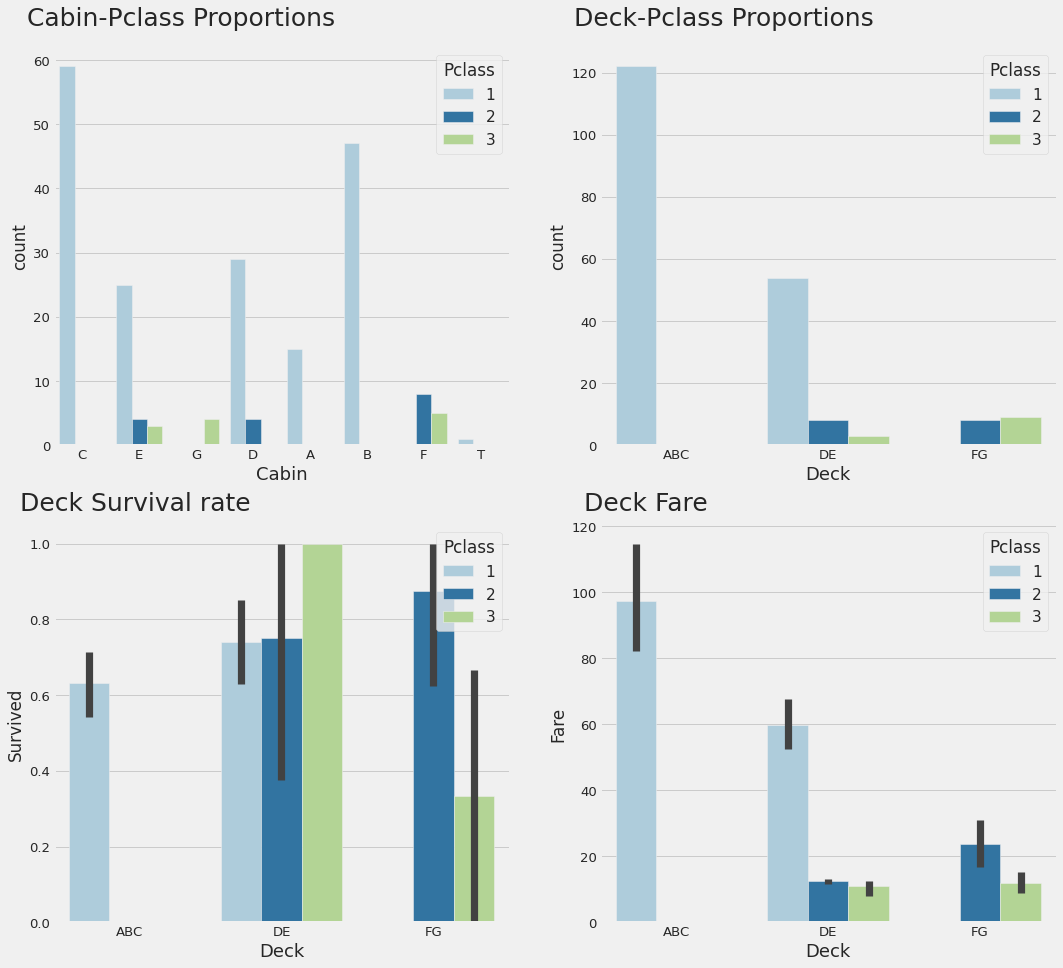

In [31]:
fig, ax = plt.subplots(2, 2, figsize=(16, 15))
sns.set(font_scale=1.4)
plt.style.use('fivethirtyeight')

cabin_data = train_data.copy()
cabin_data.Cabin.fillna('missing', inplace=True)
cabin_data['Cabin'] = cabin_data.Cabin.str.extract(pat='([A-Z])')

# figure 1
ax[0, 0].set_title('Cabin-Pclass Proportions', x=0.28, y=1.04, size=25)
sns.countplot(data=cabin_data, x='Cabin', hue='Pclass', ax=ax[0, 0], palette=palette_5)
ax[0, 0].set_xlabel('Cabin', size=18)

cabin_data.Cabin.replace({'A':'ABC', 'B':'ABC', 'C':'ABC', 'D':'DE', 'E':'DE', 'F':'FG', 
                    'G':'FG', 'T':'ABC', 'missing':'M'}, inplace=True)
# figure 2
ax[0, 1].set_title('Deck-Pclass Proportions', x=0.27, y=1.04, size=25)
sns.countplot(data=cabin_data, x='Cabin', hue='Pclass', ax=ax[0, 1], palette=palette_5)
ax[0, 1].set_xlabel('Deck', size=18)

# figure 3
ax[1, 0].set_title('Deck Survival rate', x=0.18, y=1.02, size=25)
sns.barplot(data=cabin_data, x='Cabin', y='Survived', hue='Pclass', ax=ax[1, 0], palette=palette_5)
ax[1, 0].set_xlabel('Deck', size=18)

# figure 4
ax[1, 1].set_title('Deck Fare', x=0.1, y=1.02, size=25)
sns.barplot(data=cabin_data, x='Cabin', y='Fare', hue='Pclass', ax=ax[1, 1], palette=palette_5)
ax[1, 1].set_xlabel('Deck', size=18)

sns.despine()
plt.show()

In [32]:
def imputer(df):
    # imputing missing age values
    age_impute_series = df.groupby(['Pclass', 'Sex']).Age.transform('mean')
    df.Age.fillna(age_impute_series, inplace=True)
    
    # imputing missing cabin value.
    df.Cabin = df.Cabin.str.extract(pat='([A-Z])')
    df.Cabin.fillna('M', inplace=True)
    
    # make Deck
    df['Deck'] = df.Cabin.replace({'A':'ABC', 'B':'ABC', 'C':'ABC', 'D':'DE', 'E':'DE', 'F':'FG', 
                                   'G':'FG', 'T':'ABC'}) 
    
    # we will drop the Cabin here and only take Deck from here
    df.drop('Cabin', axis=1, inplace=True)
    
    # lets just finally fill all the left over missig value with the mode of the feature.
    for feature in df.columns:
        df[feature].fillna(df[feature].mode()[0], inplace=True)
        
    return df

In [33]:
train_data.head(20)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [34]:
df = train_data.copy()
age_impute_series = df.groupby(['Pclass', 'Sex']).Age.transform('mean')
age_impute_series.head(20)

PassengerId
1     26.507589
2     34.611765
3     21.750000
4     34.611765
5     26.507589
6     26.507589
7     41.281386
8     26.507589
9     21.750000
10    28.722973
11    21.750000
12    34.611765
13    26.507589
14    26.507589
15    21.750000
16    28.722973
17    26.507589
18    30.740707
19    21.750000
20    21.750000
Name: Age, dtype: float64

In [35]:
df.Age.fillna(age_impute_series, inplace=True)
df.head(20)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,26.507589,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S


In [36]:
train_imputed = imputer(train_data.copy())
# test_imputed = imputer(test_data.copy())
# train_imputed
train_imputed.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
Deck        0
dtype: int64

#Feature Creation through EDA

* Target Distribution

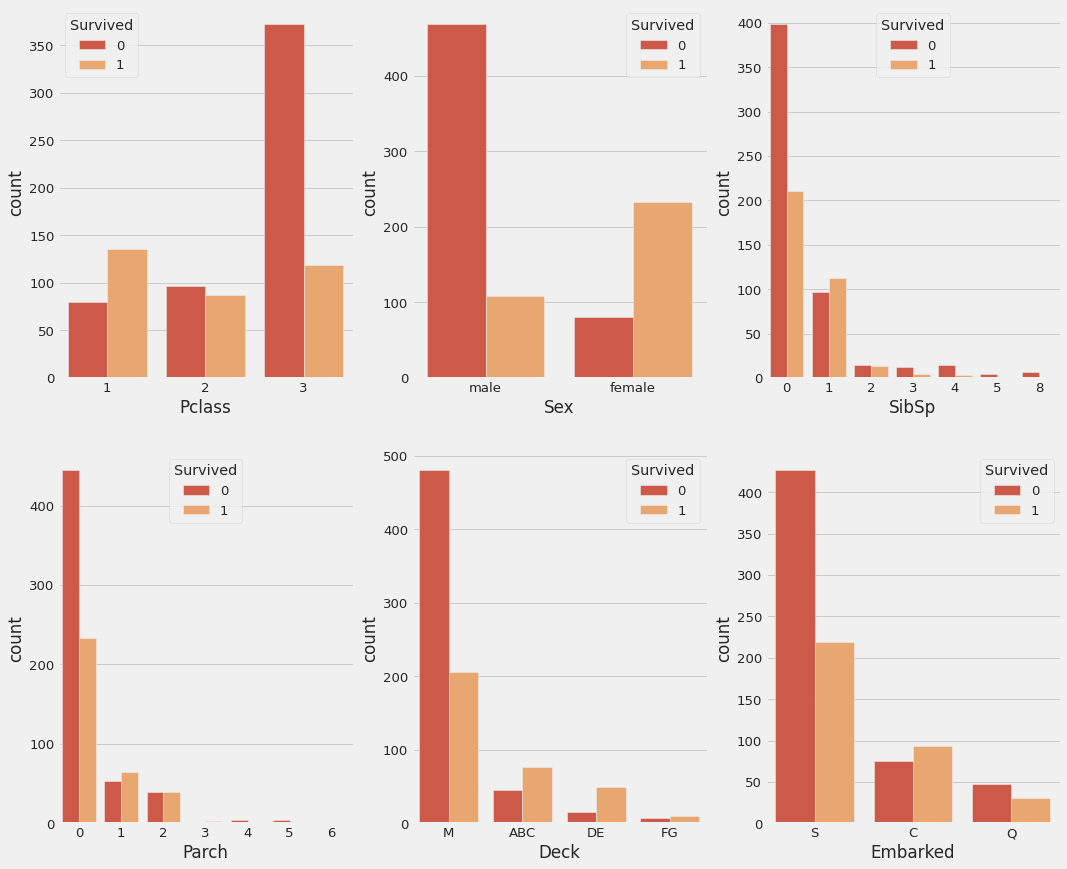

In [37]:
cat_features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Deck', 'Embarked']

plt.figure(figsize=(16, 14))
sns.set(font_scale= 1.2)
plt.style.use('fivethirtyeight')

for i, feature in enumerate(cat_features):
    plt.subplot(2, 3, i+1)
    sns.countplot(data=train_imputed, x=feature, hue='Survived', palette=palette_6)  
    
sns.despine()

* We can observe that 
>* the trend better to combine the SibSp and Parch into a common feature named Family_size such as 'Alone', 'Small_family', 'large_family'
>* small family the survival rate is better, a person is more likely to survive 

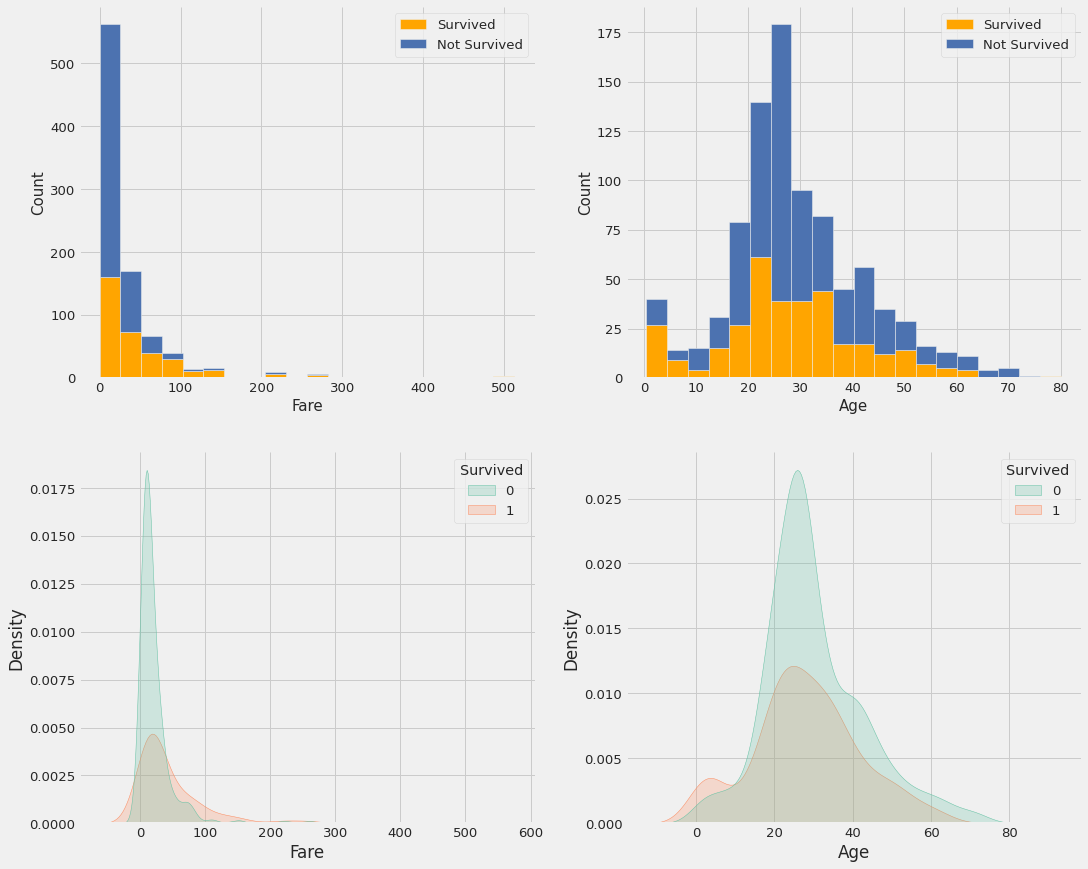

In [38]:
num_features = ['Fare', 'Age']
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16, 14))

for i, feature in enumerate(num_features):
    plt.subplot(2, 2, i+1)
    plt.hist(x=[train_imputed[feature][train_imputed['Survived'] == 1], train_imputed[feature][train_imputed['Survived']==0]],
            stacked=True, label=['Survived', 'Not Survived'], bins=20, color=['orange', 'b'])
    plt.legend()
    plt.xlabel(f'{feature}', fontsize=15)
    plt.ylabel('Count', fontsize=15)

for i, feature in enumerate(num_features):
    plt.subplot(2, 2, i+3)
    sns.kdeplot(data=train_imputed, x=feature, hue='Survived', fill=True, palette=palette_binary_3)
    
sns.despine()

* We can observe that
>* as the fare increases the survival likelihood also increases -> the Fare feature into bins and capture this trend in a better way
>* it might or might not be helpful to do so, so we will have to cross check this decision by grid searching this through a pipeline

* Binning the Fare Feature
>* we encode the higher fare category with higher numeric value, for eg: [-0.001, 7.55] -> 1, [7.55, 7.854] -> 2, [7.854, 8.05] -> 3 and so on.

PassengerId
1     7.2500
2    71.2833
3     7.9250
4    53.1000
5     8.0500
Name: Fare, dtype: float64
PassengerId
1       (-0.001, 7.75]
2    (56.929, 512.329]
3         (7.75, 8.05]
4       (27.9, 56.929]
5         (7.75, 8.05]
Name: Fare, dtype: category
Categories (7, interval[float64]): [(-0.001, 7.75] < (7.75, 8.05] < (8.05, 12.475] < (12.475, 19.258] <
                                    (19.258, 27.9] < (27.9, 56.929] < (56.929, 512.329]]


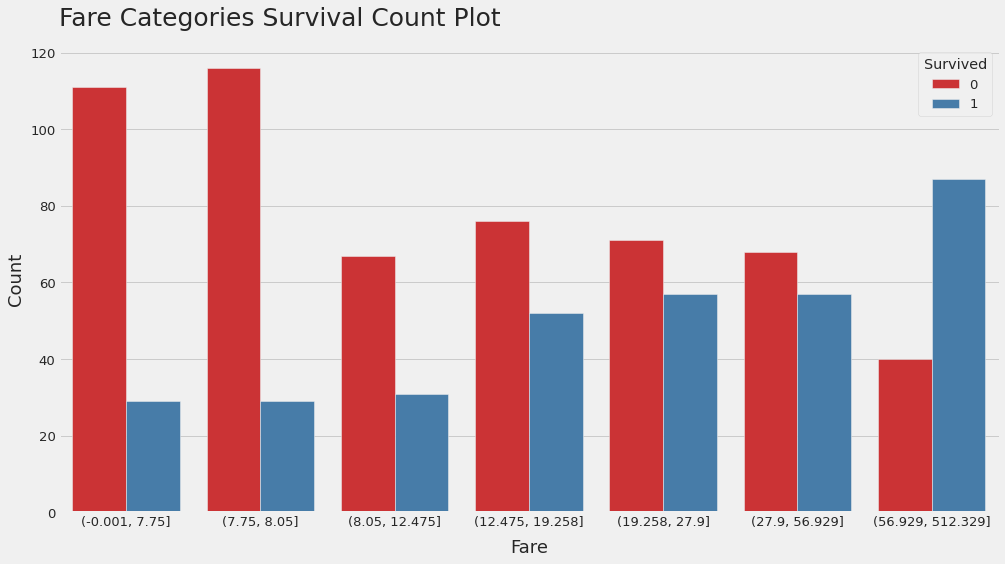

In [39]:
plt.figure(figsize=(15, 8))
plt.style.use('fivethirtyeight')

fare_data = train_imputed.copy()
print(fare_data['Fare'].head(5))

# pd.cut() : same length, pd.qcut() : same count
fare_data['Fare'] = pd.qcut(fare_data.Fare, 7)
print(fare_data['Fare'].head(5))

sns.countplot(data=fare_data, x='Fare', hue='Survived', palette=palette_binary_2)

plt.title('Fare Categories Survival Count Plot', y=1.03, fontsize=25, loc='Left')
plt.ylabel('Count', fontsize=18, labelpad=5)
plt.xlabel('Fare', fontsize=18, labelpad=10)
plt.tick_params(axis='x', labelsize=13)

sns.despine()
plt.show()


* Binning Age Feature
>*  (0.0, 5.0] is a great age bracket for survival, whereas (24.0, 34.0] is the worst, for the (30.0, 36.0] category chances seems to 50-50
>* after testing, the Age_cut feature improved the results for XGBClassifier

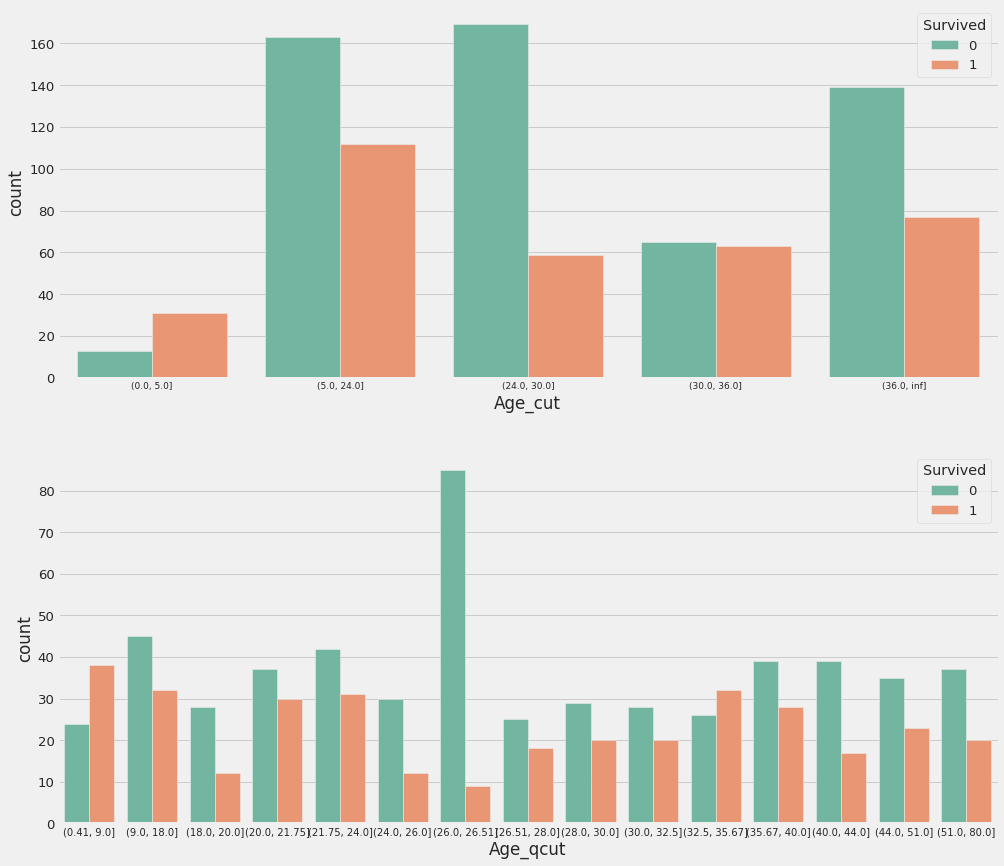

In [40]:
fig, ax = plt.subplots(2, 1, figsize=(15, 14))
plt.style.use('fivethirtyeight')

bin_age = train_imputed.copy()
bin_age['Age_cut'] = pd.cut(bin_age.Age, bins=[0, 5, 24, 30, 36, np.inf])
bin_age['Age_qcut'] = pd.qcut(bin_age.Age, 15, precision=2)

sns.countplot(data=bin_age, x='Age_cut', hue='Survived', ax=ax[0], palette=palette_binary_3)
ax[0].tick_params(axis='x', labelsize=9)

sns.countplot(data=bin_age, x='Age_qcut', hue='Survived', ax=ax[1], palette=palette_binary_3)
ax[1].tick_params(axis='x', labelsize=10)

sns.despine()
plt.show()

* Ticket Based Features
>* ticket feature contains tickets with few of them with alphabets and some of them with only numbers
>* extract this relation but it might not be useful 
>* the frequency of tickets, there are people with same ticket numbers which shows that group of friends and family travelled together
>* first, lets check out if just dividing ticket into ticket with alphabets and only numeric serial code helps or not

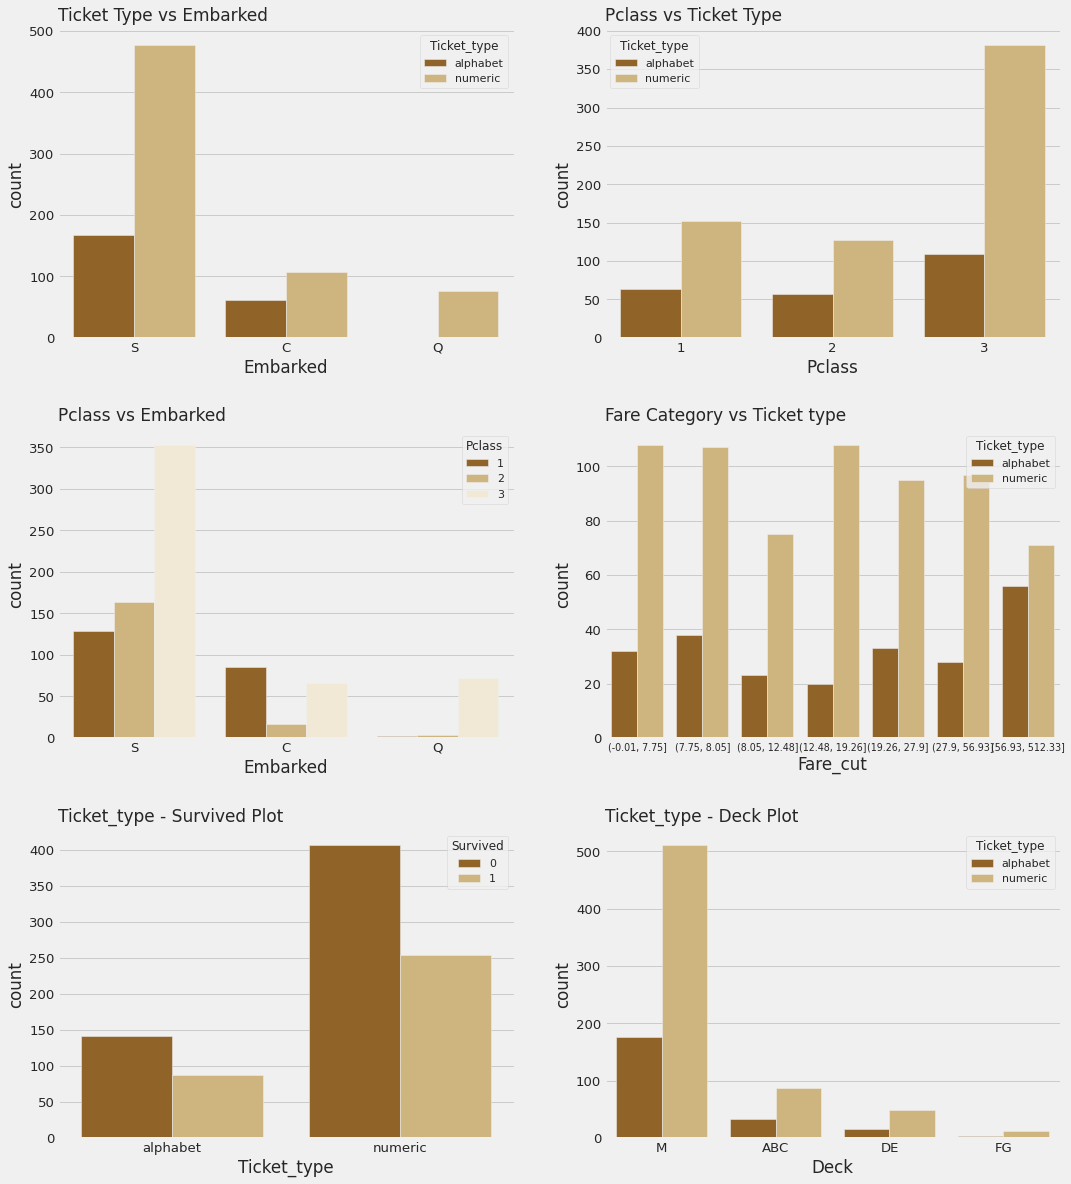

In [41]:
ticket_feature = train_imputed.copy()
ticket_feature['Ticket_type'] = pd.Series(np.where(ticket_feature.Ticket.str.contains(pat='[A-Z]'), 'alphabet', 'numeric'), index=ticket_feature.index)
ticket_feature['Fare_cut'] = pd.qcut(ticket_feature.Fare, 7, precision=2)

y=1.01
size=17
fig, ax = plt.subplots(3, 2, figsize=(16, 19))
plt.subplots_adjust(hspace=0.3)

sns.set(font_scale=1)
plt.style.use('fivethirtyeight')

sns.countplot(data=ticket_feature, x='Embarked', hue='Ticket_type', ax=ax[0, 0], palette=palette_3)
ax[0, 0].set_title('Ticket Type vs Embarked', size=size, loc='Left', y=y)

sns.countplot(data=ticket_feature, x='Pclass', hue='Ticket_type', ax=ax[0, 1], palette=palette_3)
ax[0, 1].set_title('Pclass vs Ticket Type', size=size, loc='Left', y=y)

sns.countplot(data=ticket_feature, x='Embarked', hue='Pclass', ax=ax[1, 0], palette=palette_3)
ax[1, 0].set_title('Pclass vs Embarked', size=size, loc='Left', y=y)

sns.countplot(data=ticket_feature, x='Fare_cut', hue='Ticket_type', ax=ax[1, 1], palette=palette_3)
ax[1, 1].set_title('Fare Category vs Ticket type', size=size, loc='Left', y=y)
ax[1, 1].tick_params(axis='x', labelsize=9.5)

sns.countplot(data=ticket_feature, x='Ticket_type', hue='Survived', ax=ax[2, 0], palette=palette_3)
ax[2, 0].set_title('Ticket_type - Survived Plot', size=size, loc='Left', y=y)

sns.countplot(data=ticket_feature, x='Deck', hue='Ticket_type', ax=ax[2, 1], palette=palette_3)
ax[2, 1].set_title('Ticket_type - Deck Plot', size=size, loc='Left', y=y)

sns.despine()
plt.show()

* As seen from above:
>* no general trend is visible by categorizing ticket with or without alphabets
* There are few points to note though:
>* mostly numeric tickets were sold at the 'Q' which is Queenstown
>* proportion of ticket with alphabets bought is less for Pclass 3 as seen from 'Pclass vs Ticket Type plot'
* However, overall there is no pattern 
>* lets extract even finer ticket types, maybe model finds some use out of it

In [42]:
def ticket_extractor(ticket):
    alpha = re.sub('\d', '', ticket)
    if alpha:
        return alpha
    else:
        num = re.search('\d{1,9}', ticket)
        return ticket

In [43]:
ticket_extracted = train_imputed.copy()
print(ticket_extracted['Ticket'].head(5))
print("")
ticket_extracted['Ticket_extracted'] = ticket_extracted.Ticket.apply(ticket_extractor)
print(ticket_extracted['Ticket_extracted'].head(5))
print("")

for i in range(len(ticket_extracted.Ticket)):
    try:
        int(ticket_extracted.Ticket_extracted.iloc[i])
        ticket_extracted.Ticket_extracted.iloc[i] = f'Num_{len(ticket_extracted.Ticket_extracted.iloc[i])}'
    except:
        continue
print(ticket_extracted['Ticket_extracted'].head(5))
print("")

for label, pattern in [('_ca', 'C[.]?A[.]?'), ('_PC', 'PC'), ('_SOTON', 'SOTON'), ('_STON', 'STON'), 
                       ('_WC', 'W[.]?[/]?C'), ('_SC', 'S[.]?C[.]?'), ('_A', 'A[.]?'), ('_SOC', 'S[.]?O[.]?[/]?C'), 
                       ('_PP', 'PP'), ('_FC', '(F.C.|F.C.C.)'), ('_LS_number', 'Num_(6|7)'), ('_SS_number', 'Num_(3|4|5)'), 
                       ('rare', '^[^_]')]:
    ticket_extracted.Ticket_extracted[ticket_extracted.Ticket_extracted.str.contains(pattern)] = label
print(ticket_extracted['Ticket_extracted'].head(5))
print("")

ticket_extracted['Ticket_extracted'].value_counts(dropna=False)

PassengerId
1           A/5 21171
2            PC 17599
3    STON/O2. 3101282
4              113803
5              373450
Name: Ticket, dtype: object

PassengerId
1         A/ 
2         PC 
3    STON/O. 
4      113803
5      373450
Name: Ticket_extracted, dtype: object

PassengerId
1         A/ 
2         PC 
3    STON/O. 
4       Num_6
5       Num_6
Name: Ticket_extracted, dtype: object

PassengerId
1            _A
2           _PC
3         _STON
4    _LS_number
5    _LS_number
Name: Ticket_extracted, dtype: object



/usr/local/lib/python3.7/dist-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


_LS_number    431
_SS_number    230
_PC            60
_ca            42
_A             29
_STON          18
rare           18
_SC            17
_SOTON         17
_WC            10
_PP             7
_FC             6
_SOC            6
Name: Ticket_extracted, dtype: int64

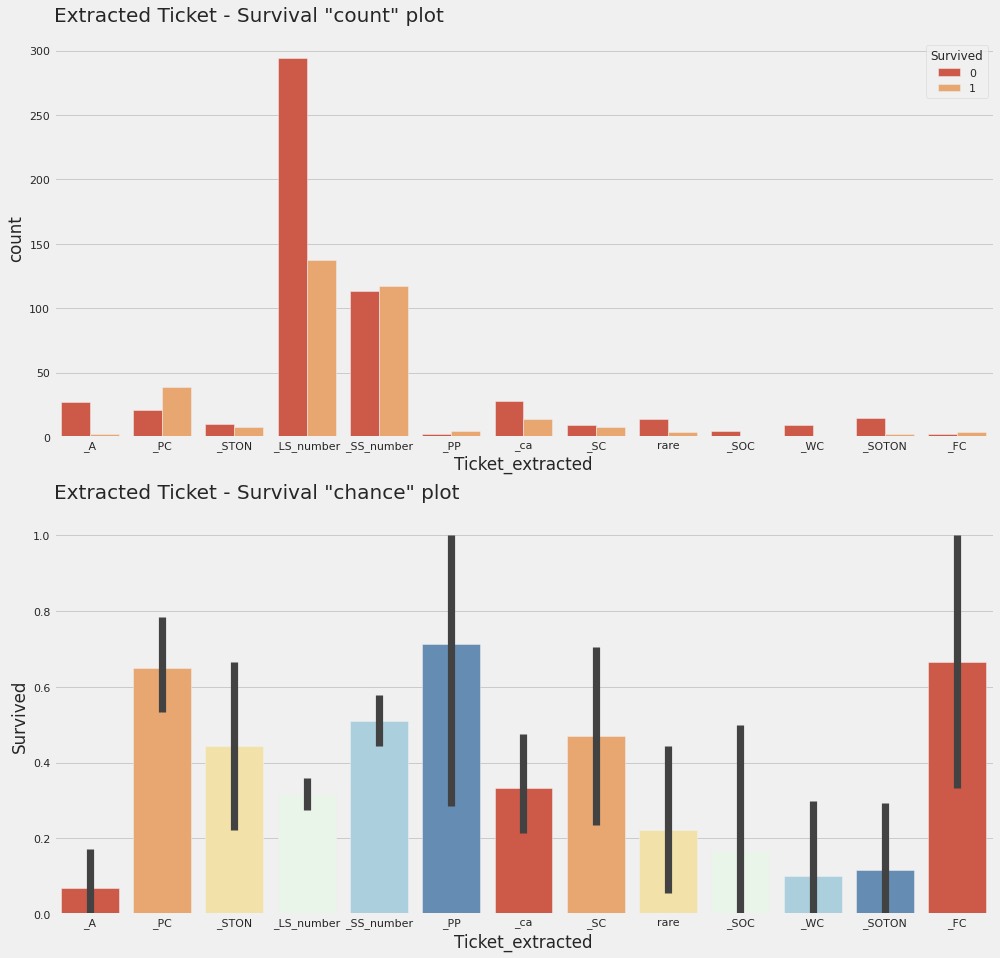

In [44]:
fig, ax = plt.subplots(2, 1, figsize=(15, 15))
plt.style.use('fivethirtyeight')

sns.countplot(data=ticket_extracted, x='Ticket_extracted', hue='Survived', ax=ax[0], palette=palette_6)
ax[0].set_title('Extracted Ticket - Survival "count" plot', size=20, loc='Left', y=1.03)

sns.barplot(data=ticket_extracted, x='Ticket_extracted', y='Survived', ax=ax[1], palette=palette_6)
ax[1].set_title('Extracted Ticket - Survival "chance" plot', size=20, loc='Left', y=1.03)

sns.despine()
plt.show()

PassengerId
1    1
2    1
3    1
4    2
5    1
Name: Ticket_frequency, dtype: int64

PassengerId
1      (-0.01, 7.75]
2    (56.93, 512.33]
3       (7.75, 8.05]
4      (27.9, 56.93]
5       (7.75, 8.05]
Name: Fare_qcut, dtype: category
Categories (7, interval[float64]): [(-0.01, 7.75] < (7.75, 8.05] < (8.05, 12.48] < (12.48, 19.26] <
                                    (19.26, 27.9] < (27.9, 56.93] < (56.93, 512.33]]



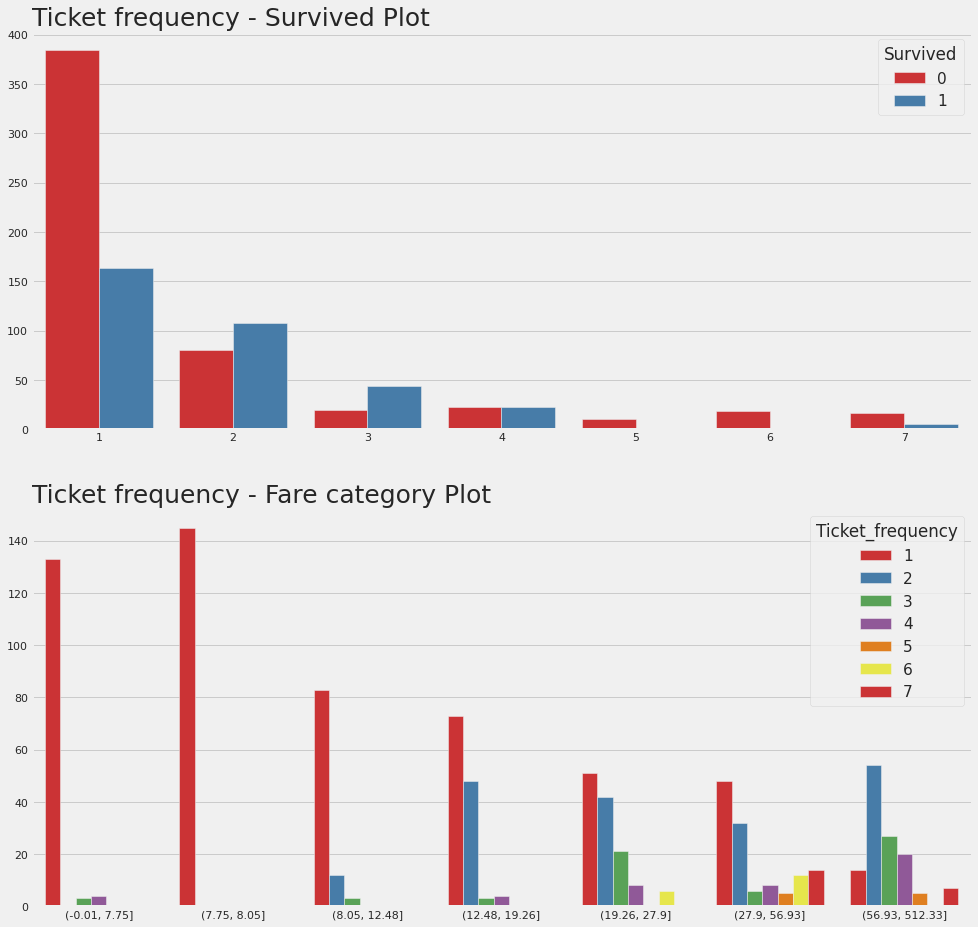

In [45]:
ticket_extracted['Ticket_frequency'] = ticket_extracted.Ticket.map(ticket_extracted.Ticket.value_counts(dropna=False))
print(ticket_extracted['Ticket_frequency'].head(5))
print("")
ticket_extracted['Fare_qcut'] = pd.qcut(ticket_extracted.Fare, 7, precision=2)
print(ticket_extracted['Fare_qcut'].head(5))
print("")

y=1
size=25
fig, ax = plt.subplots(2, 1, figsize=(15, 15))
sns.set(font_scale=1.4)
plt.style.use('fivethirtyeight')

sns.countplot(data=ticket_extracted, x='Ticket_frequency', hue='Survived', ax=ax[0], palette=palette_2)
ax[0].set_title('Ticket frequency - Survived Plot', loc='Left', y=y, size=size)
ax[0].set_xlabel('')
ax[0].set_ylabel('')

sns.countplot(data=ticket_extracted, x='Fare_qcut', hue='Ticket_frequency', ax=ax[1], palette=palette_2)
ax[1].set_title('Ticket frequency - Fare category Plot', loc='Left', y=y, size=size)
ax[1].set_xlabel('')
ax[1].set_ylabel('')

sns.despine()
plt.show()

* Findings:
>* the survival chance for people with ticket frequency from 2-4 was more
>* new information, it seems that higher frequency mean higher ticket fare which is actually the cummulative ticket price for all passenger, which means that Fare column does not contain the fare for an individual person but the total fare for a group with same ticket
>* a new feature which is fare_per_individual
* Lets check it out if it is good or not

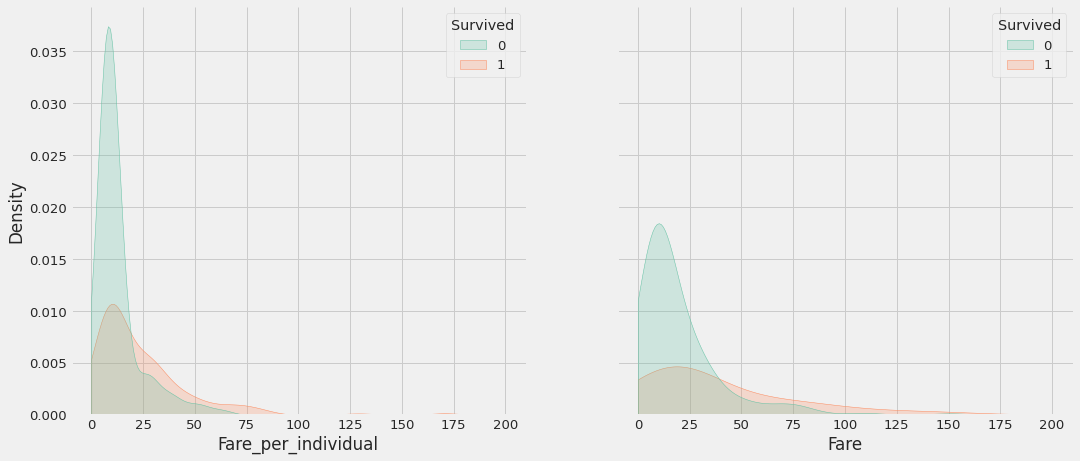

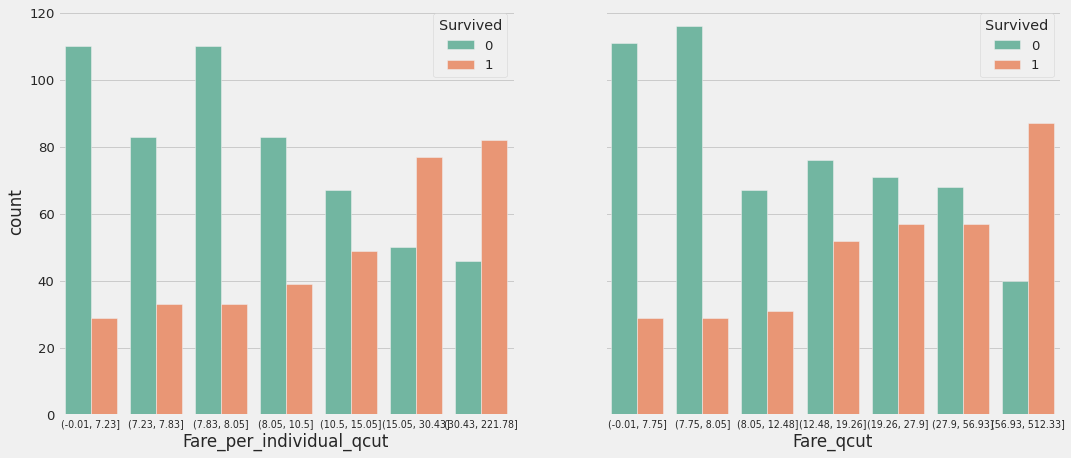

In [46]:
trick_freq = train_imputed.copy()
trick_freq['Ticket_frequency'] = trick_freq.Ticket.map(trick_freq.Ticket.value_counts(dropna=False))
# print(trick_freq['Ticket_frequency'].head(5))
# print("")
trick_freq['Fare_qcut'] = pd.qcut(trick_freq.Fare, 7, precision=2)
# print(trick_freq['Fare_qcut'].head(5))
# print("")
trick_freq['Fare_per_individual'] = trick_freq['Fare'] / trick_freq['Ticket_frequency']
trick_freq['Fare_per_individual_qcut'] = pd.qcut(trick_freq.Fare_per_individual, 7, precision=2)

y = 1
size = 18
sns.set(font_scale=1.2)
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(1, 2, figsize=(16, 7), sharey=True)

# figure 1
sns.kdeplot(data=trick_freq, x='Fare_per_individual', hue='Survived', clip=[0, 200], fill=True, ax=ax[0], palette=palette_binary_3)

# figure 2
sns.kdeplot(data=trick_freq, x='Fare', hue='Survived', clip=[0, 200],  fill=True, ax=ax[1], palette=palette_binary_3)
ax[1].set_ylabel('')
sns.despine()

fig, ax = plt.subplots(1, 2, figsize=(16, 7), sharey=True)

sns.countplot(data=trick_freq, x='Fare_per_individual_qcut', hue='Survived', ax=ax[0], palette=palette_binary_3)
ax[0].tick_params(axis='x', labelsize=9.5)
#ax[0].set_ylabel('')
#ax[0].set_xlabel('')

sns.countplot(data=trick_freq, x='Fare_qcut', hue='Survived', ax=ax[1], palette=palette_binary_3)
ax[1].tick_params(axis='x', labelsize=9.5)
ax[1].set_ylabel('')
#ax[1].set_xlabel('')

sns.despine()
plt.show()

* Findings :
>* the probability distribution function did not show much difference
>* fare_per_individual category gave us a better steady increase in survival rate from left to righ

* **Family Size Feature** 
>* each individual has a SibSp and Parch, so if we add these features together for an individual and add 1 to it, 1 being the individual themself, we can create a new feature Family_size
>* It is an important feature as it reveals that passengers with family size 2 - 4 had a better survival rate than passengers travelling alone or who had larger families

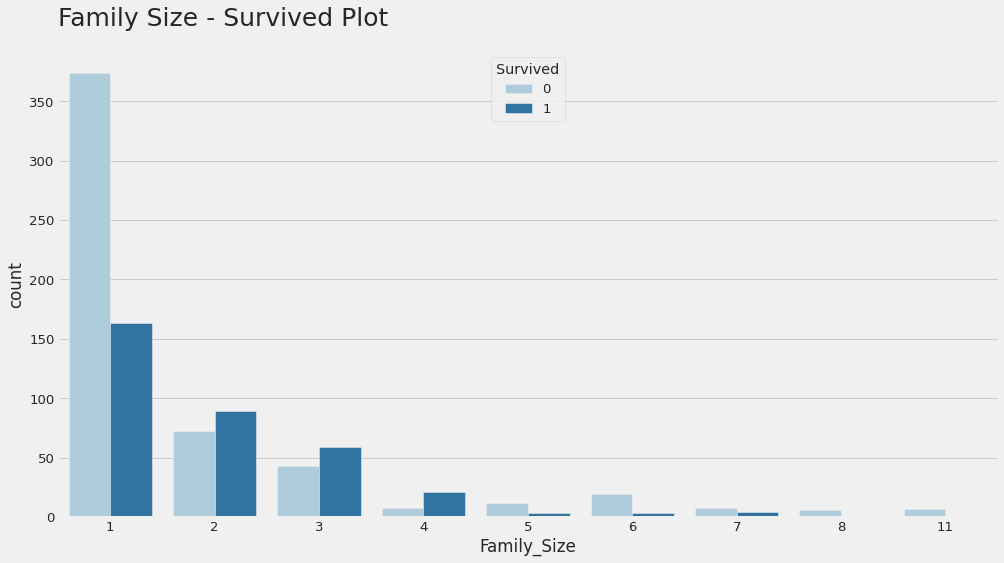

In [47]:
family_size = train_imputed.copy()
family_size['Family_Size'] = family_size['SibSp'] + family_size['Parch'] + 1
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots(1, 1, figsize=(15, 8))
sns.countplot(data=family_size, x='Family_Size', hue='Survived', ax=ax, palette=palette_5)
ax.set_title('Family Size - Survived Plot', size=25, loc='Left', y=1.04)

sns.despine()
plt.show()

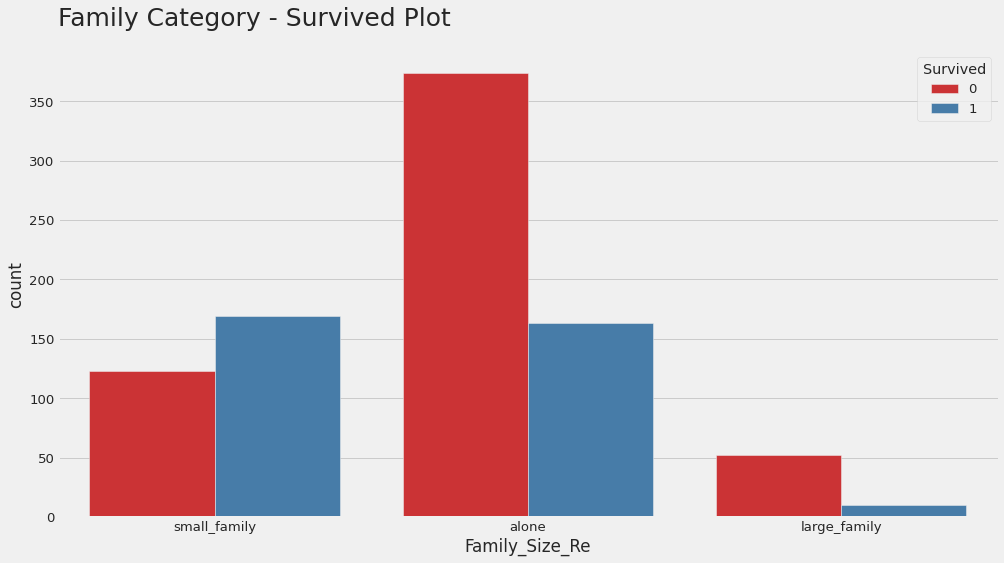

In [48]:
family_size['Family_Size_Re'] = family_size['Family_Size'].replace({1:'alone', 2:'small_family', 3:'small_family', 4:'small_family'
                                                      ,5:'large_family', 6:'large_family', 7:'large_family'
                                                      ,8:'large_family', 9:'large_family', 10:'large_family', 
                                                       11:'large_family'})

fig, ax = plt.subplots(1, 1, figsize=(15, 8))
plt.style.use('fivethirtyeight')

sns.countplot(data=family_size, x='Family_Size_Re', hue='Survived', ax=ax, palette=palette_binary_2)
ax.set_title('Family Category - Survived Plot', size=25, loc='Left', y=1.04)

sns.despine()
plt.show()

* Name Length Feature
>* people with higher status usually had longer names

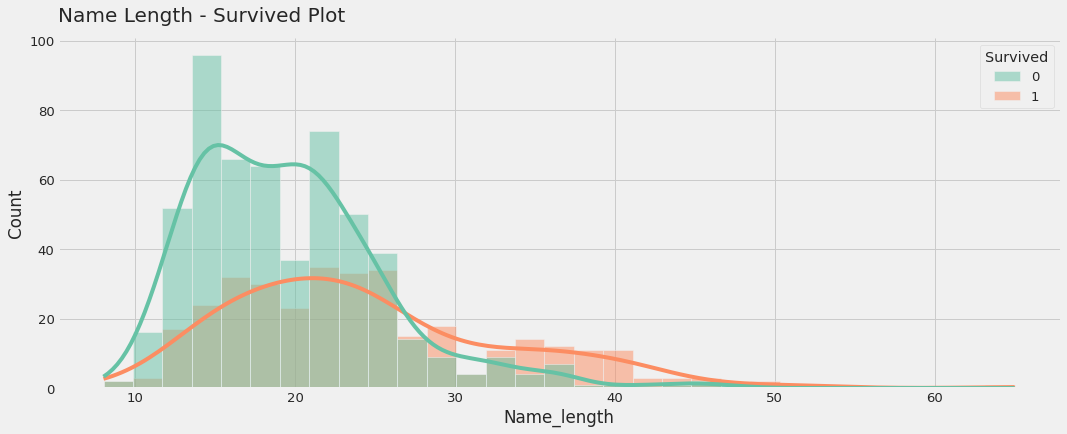

In [49]:
name_length = train_imputed.copy()
name_length['Name_length'] = name_length.Name.str.replace(pat='[^a-zA-Z]', repl='').str.len()
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots(1, 1, figsize=(16, 6))
sns.histplot(data=name_length, x='Name_length', hue='Survived', kde=True, fill=True, ax=ax, palette=palette_binary_3)
ax.set_title('Name Length - Survived Plot', size=20, loc='Left', y=1.03)

sns.despine()
plt.show()

* Name Title

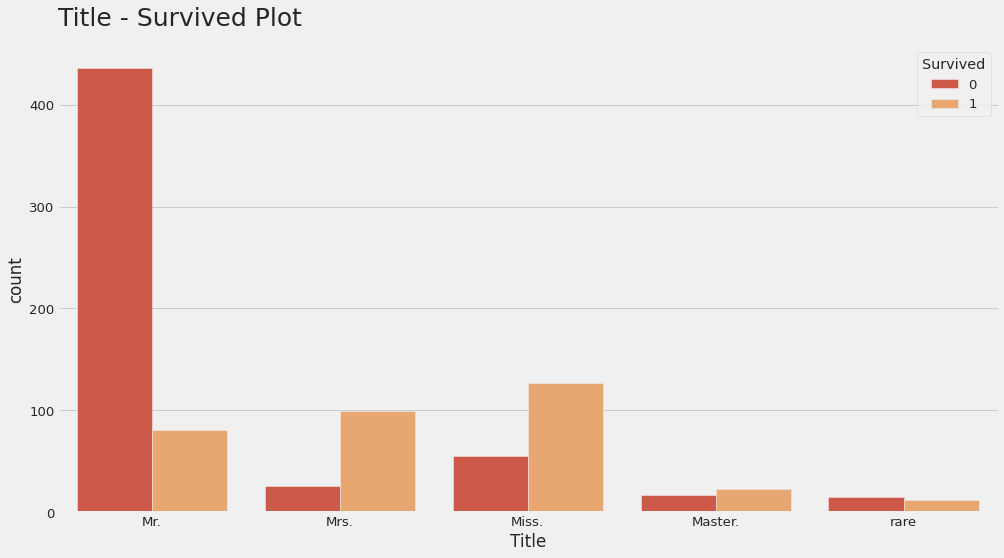

In [50]:
name_title = train_imputed.copy()

name_title['Title'] = name_title.Name.str.extract(pat='([a-zA-Z]+\.)')

name_title.Title[~name_title.Title.isin(['Mr.', 'Miss.', 'Mrs.', 'Master.'])] = 'rare'

fig, ax = plt.subplots(1, 1, figsize=(15, 8))
plt.style.use('fivethirtyeight')

sns.countplot(data=name_title, x='Title', hue='Survived', ax=ax, palette=palette_6)
ax.set_title('Title - Survived Plot', loc='Left', size=25, y=1.03)

sns.despine()
plt.show()

* Survival Rate
>* Intuition behind the Survival rate feature:
>>* usually people belonging to a family and Ticket group survived together or died together

PassengerId
1       Braund
2      Cumings
3    Heikkinen
4     Futrelle
5        Allen
Name: Family_Name, dtype: object

PassengerId
1    2
2    2
3    1
4    2
5    1
Name: Family_Size, dtype: int64

PassengerId
1    1
2    1
3    1
4    2
5    1
Name: Ticket_Frequency, dtype: int64

PassengerId
1    0.0
2    1.0
3    1.0
4    0.5
5    0.5
Name: Family_Survival_Rate, dtype: float64

PassengerId
1    0.0
2    1.0
3    1.0
4    0.5
5    0.0
Name: Ticket_Group_Survival_Rate, dtype: float64



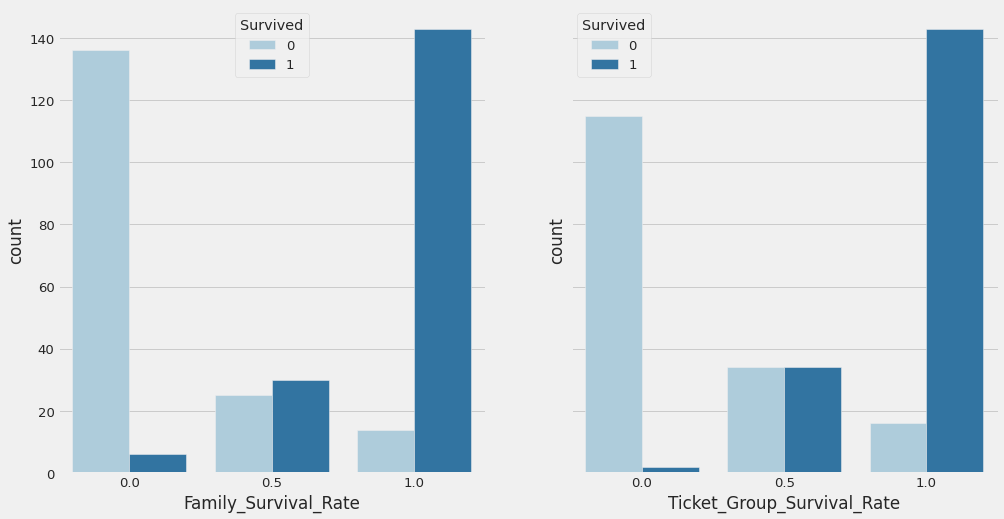

In [51]:
survival_rate = train_imputed.copy()
survival_rate['Family_Name'] = survival_rate.Name.str.split(',', n=1, expand=True).iloc[:, 0]
print(survival_rate['Family_Name'].head(5))
print("")
survival_rate['Family_Size'] = survival_rate['SibSp'] + survival_rate['Parch'] + 1
print(survival_rate['Family_Size'].head(5))
print("")
survival_rate['Ticket_Frequency'] = survival_rate.Ticket.map(survival_rate.Ticket.value_counts()) 
print(survival_rate['Ticket_Frequency'].head(5))
print("")

survival_rate['Family_Survival_Rate'] = survival_rate.Family_Name.map(survival_rate.groupby(['Family_Name']).Survived.median())
print(survival_rate['Family_Survival_Rate'].head(5))
print("")

survival_rate['Ticket_Group_Survival_Rate'] = survival_rate.Ticket.map(survival_rate.groupby(['Ticket']).Survived.median())
print(survival_rate['Ticket_Group_Survival_Rate'].head(5))
print("")

fig, ax = plt.subplots(1, 2, figsize=(15, 8), sharey=True)
plt.style.use('fivethirtyeight')

sns.countplot(data=survival_rate[survival_rate['Family_Size'] > 1], x='Family_Survival_Rate', hue='Survived', ax=ax[0], palette=palette_5)
# we will only take into account those instance with Family size > 1 for visualization to explore the effectiveness of the Survival rate feature

sns.countplot(data=survival_rate[survival_rate['Ticket_Frequency'] > 1], x='Ticket_Group_Survival_Rate', hue='Survived', ax=ax[1], palette=palette_5)
# we will only take into account those instance with Ticket_frequency > 1 for visualization to explore the effectiveness of the Survival rate feature

sns.despine()
plt.show()

---
#**EDA Conclusion**

1. Missing value imputation
>* find better ways to impute the Age and Embarked feature.
>>* imputing Age Feature
>>* imputing Embarked Feature

2. Feature Creation through EDA
* Bin Fare feature to simplify and express patterns
* Bin Age feature to simplify and express patterns
* Better way to extract information from Ticket feature
>* creation of Ticket_frequency feature and Ticket_extracted feature through the Ticket frequency feature
>* gain information regarding Fare_per_individual feature and possibility of binning it.
* Family size feature and possibility of simplification
* Name length feature
* Survival rate feature